In [6]:
import data_manage 
import proj_io
import glob, os, sys
import imp  
import matplotlib.pyplot as plt
import numpy as np

# test extract the nii and thickness file

In [2]:
nii_path = '/Users/sunzhuo/Downloads/Voxel_Aging/PPMI/3101V1/T1w/3101V1/mri/mri/mwp1nu.nii'
thick_path = '/Users/sunzhuo/Downloads/Voxel_Aging/PPMI/3101V1/T1w/3101V1/surf/lh.thickness'

vol_data = proj_io.load_nifti_im_array(nii_path)
print(f'vol_data.shape => {vol_data.shape}')

thick_data = proj_io.load_thickness(thick_path)
print(f'thick_data.shape => {thick_data.shape}')



vol_data.shape => (113, 137, 113)
thick_data.shape => (150961,)


# test extract roi feat for a single subject under segmentation for Vol and Surf data

## for volumn data 

mask.shape => (113, 137, 113)
[[0.0, 1110253], [1.0, 240641], [2.0, 236838], [3.0, 29547], [4.0, 28634], [5.0, 3644], [6.0, 3609], [7.0, 28079], [8.0, 27214], [9.0, 2651], [10.0, 2524], [11.0, 1276], [12.0, 1186], [13.0, 6930], [14.0, 5477], [15.0, 5174], [16.0, 4836], [17.0, 1842], [18.0, 1711], [19.0, 1667], [20.0, 1660], [23.0, 6], [25.0, 1998], [26.0, 1956]]


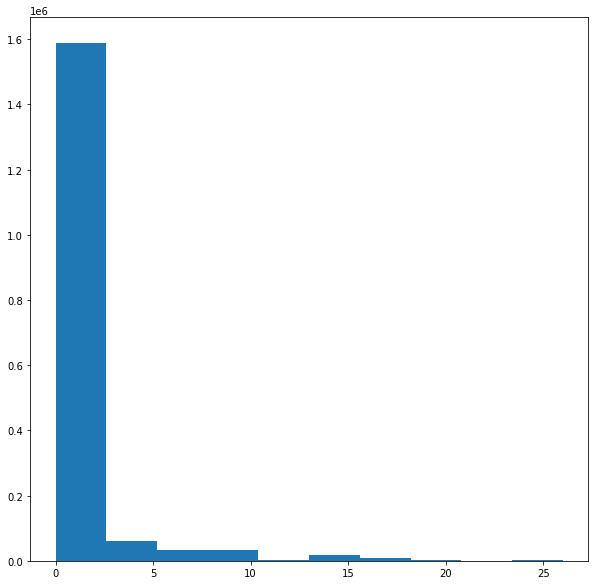

1 => (240641,)
3 => (29547,)
10 => (2524,)


In [11]:
mask_path = '/Users/sunzhuo/Downloads/Voxel_Aging/mask/volume/cat_base/cat.nii'
mask = proj_io.load_nifti_im_array(mask_path)
print(f'mask.shape => {mask.shape}')

label, counts = np.unique(mask, return_counts=True)
n1 = len(label)
pair = [[label[ind], counts[ind]] for ind in range(n1)]
print(pair)
plt.figure(figsize=(10,10))
plt.hist(mask.flatten())
plt.show()

roi_list = [1,3,10]

feat_dict = proj_io.extract_feat_in_ROI(vol_data, mask, roi_list=roi_list, out_folder=None)
for key in feat_dict:
    print(f'{key} => {feat_dict[key].shape}')

## for surface data  (TODO)

# test the batch/parallel extract on roi feature

In [13]:
data_dict = {}
data_dict['dataset'] = 'cat_base'

# test the function in data_manage.py